## Earthquake Type Prediction

Given *data about earthquakes*, let's try to predict if a given earthquake is **automatic or reviewed**.
(An earthquake is "reviewed" when automatic earthquake detection systems fail to record the earthquake)

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/usgs/earthquake-database

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

import warnings
warnings.simplefilter('ignore')

2025-04-06 11:07:17.677874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('database.csv')
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
# Drop ID column
data = data.drop('ID', axis=1)

In [5]:
data.isna().mean()*100

Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64

In [6]:
null_columns = data.loc[:,data.isna().sum() > 0.66 * data.shape[0]].columns

In [7]:
data = data.drop(null_columns, axis=1)

In [8]:
data.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [9]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [10]:
data.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [11]:
data = data.dropna(axis=0).reset_index(drop=True)

In [12]:
data.isna().sum().sum()

0

In [13]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed


### Feature Engineering

In [14]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed


In [15]:
data['Month'] = data['Date'].apply(lambda x: x[0:2])
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12


In [16]:
data['Year'] = data['Date'].apply(lambda x: x[-4:])
data.drop('Date', axis=1, inplace=True)

In [17]:
data

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year
0,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
1,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
2,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
3,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
4,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016
23405,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016
23406,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016
23407,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016


In [18]:
data['Month'] = data['Month'].astype(int)

In [19]:
invalid_year_indices = data.loc[data['Year'].str.contains('Z'),:].index
data = data.drop(invalid_year_indices, axis=0).reset_index(drop=True)

In [20]:
data['Year'] = data['Year'].astype(int)

In [21]:
data

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year
0,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
1,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
2,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
3,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
4,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016
23402,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016
23403,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016
23404,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016


In [22]:
data['Hour'] = data['Time'].apply(lambda x: x[0:2])

In [23]:
data = data.drop('Time', axis=1)
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016,08
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016,09
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016,22


In [24]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [25]:
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

### Visualize 

In [26]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']
numeric_columns

['Latitude',
 'Longitude',
 'Depth',
 'Magnitude',
 'Root Mean Square',
 'Status',
 'Month',
 'Year']

In [27]:
corr = data[numeric_columns].corr()

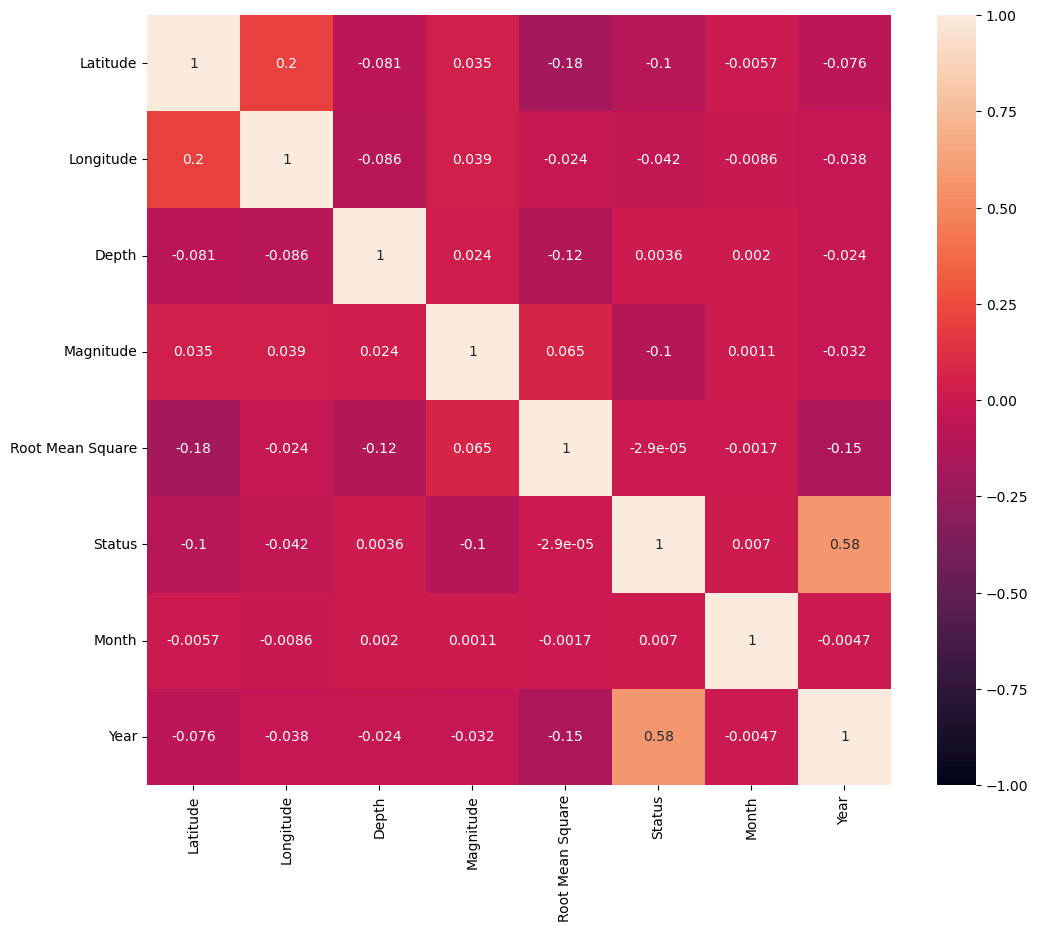

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [29]:
numeric_columns.remove('Status')

In [30]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)

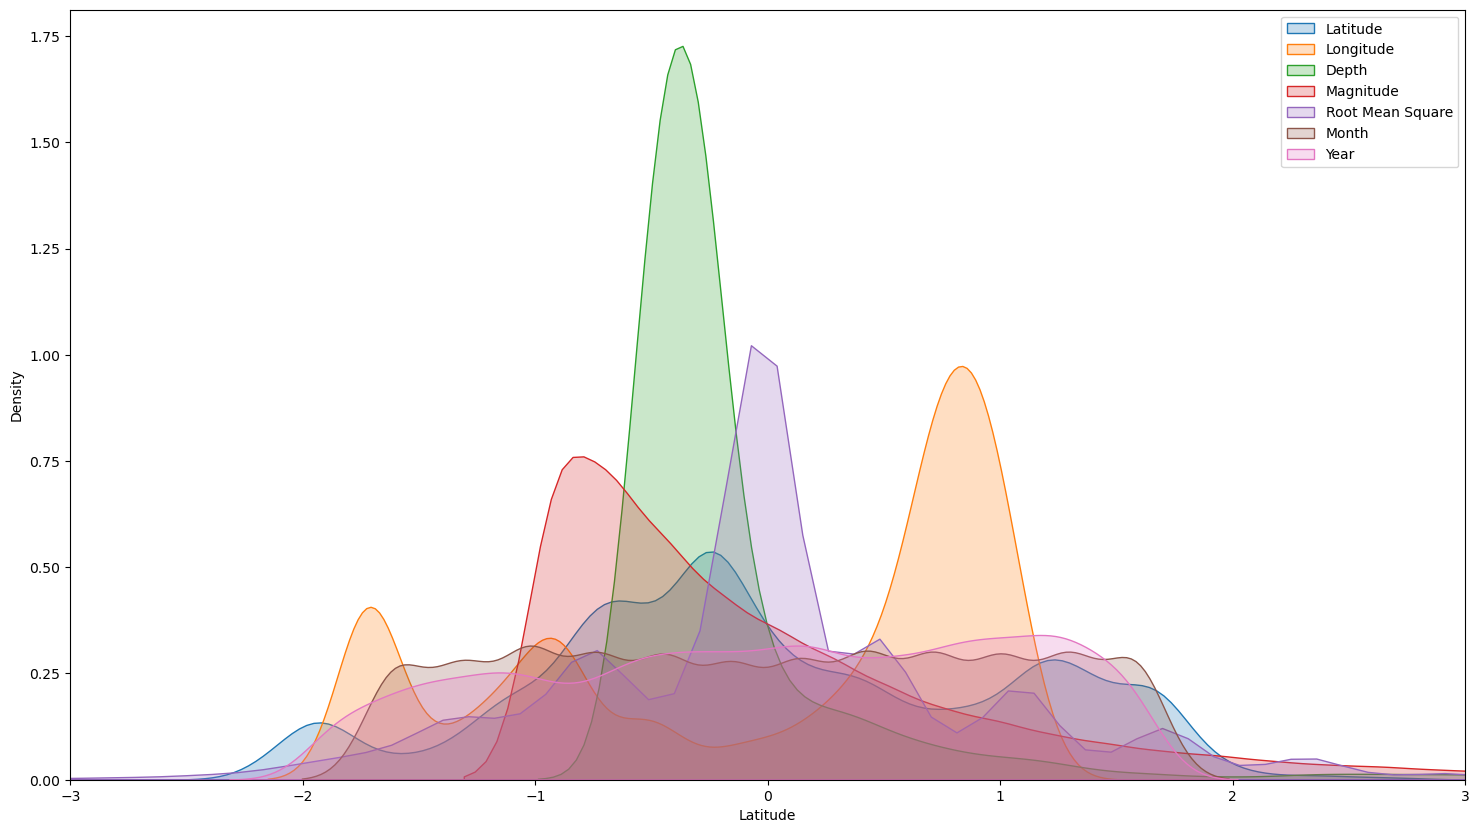

In [31]:
plt.figure(figsize=(18, 10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], shade=True, label=column)
    plt.legend()
plt.xlim(-3, 3)
plt.show()

### Encoding

In [32]:
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,1,12,2016,08
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,1,12,2016,09
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,1,12,2016,22


In [33]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [34]:
(data['Location Source'] != data['Source']).sum()

415

In [35]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [38]:
data = onehot_encode(
    data,
    ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
    ['T', 'MT', 'S', 'LS', 'MS']
)

In [39]:
data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,T_Earthquake,T_Explosion,T_Nuclear Explosion,T_Rock Burst,MT_MB,MT_MD,MT_MH,MT_ML,MT_MS,MT_MW,MT_MWB,MT_MWC,MT_MWR,MT_MWW,S_AK,S_CI,S_GCMT,S_ISCGEM,S_ISCGEMSUP,S_NC,S_NN,S_OFFICIAL,S_PR,S_SE,S_US,S_UW,LS_AEI,LS_AEIC,LS_AG,LS_AGS,LS_AK,LS_ATH,LS_B,LS_BEO,LS_BOU,LS_BRK,LS_CAR,LS_CASC,LS_CI,LS_CSEM,LS_G,LS_GCMT,LS_GUC,LS_H,LS_HVO,LS_ISCGEM,LS_ISK,LS_JMA,LS_LIM,LS_MDD,LS_NC,LS_NN,LS_OTT,LS_PGC,LS_PR,LS_ROM,LS_RSPR,LS_SE,LS_SJA,LS_SLC,LS_SPE,LS_TAP,LS_TEH,LS_THE,LS_THR,LS_TUL,LS_U,LS_UCR,LS_UNM,LS_US,LS_US_WEL,LS_UW,LS_WEL,MS_1000,MS_1009,MS_1020,MS_1023,MS_AK,MS_BRK,MS_CI,MS_GCMT,MS_GUC,MS_HRV,MS_ISCGEM,MS_NC,MS_NIED,MS_NN,MS_OFFICIAL,MS_PAR,MS_PGC,MS_PR,MS_SE,MS_US,MS_US_GCMT,MS_US_PGC,MS_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [40]:
### Split and Scale data
y = data['Status']
X = data.drop('Status', axis=1)

In [41]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month,Year,Hour,T_Earthquake,T_Explosion,T_Nuclear Explosion,T_Rock Burst,MT_MB,MT_MD,MT_MH,MT_ML,MT_MS,MT_MW,MT_MWB,MT_MWC,MT_MWR,MT_MWW,S_AK,S_CI,S_GCMT,S_ISCGEM,S_ISCGEMSUP,S_NC,S_NN,S_OFFICIAL,S_PR,S_SE,S_US,S_UW,LS_AEI,LS_AEIC,LS_AG,LS_AGS,LS_AK,LS_ATH,LS_B,LS_BEO,LS_BOU,LS_BRK,LS_CAR,LS_CASC,LS_CI,LS_CSEM,LS_G,LS_GCMT,LS_GUC,LS_H,LS_HVO,LS_ISCGEM,LS_ISK,LS_JMA,LS_LIM,LS_MDD,LS_NC,LS_NN,LS_OTT,LS_PGC,LS_PR,LS_ROM,LS_RSPR,LS_SE,LS_SJA,LS_SLC,LS_SPE,LS_TAP,LS_TEH,LS_THE,LS_THR,LS_TUL,LS_U,LS_UCR,LS_UNM,LS_US,LS_US_WEL,LS_UW,LS_WEL,MS_1000,MS_1009,MS_1020,MS_1023,MS_AK,MS_BRK,MS_CI,MS_GCMT,MS_GUC,MS_HRV,MS_ISCGEM,MS_NC,MS_NIED,MS_NN,MS_OFFICIAL,MS_PAR,MS_PGC,MS_PR,MS_SE,MS_US,MS_US_GCMT,MS_US_PGC,MS_UW
0,0.583557,0.844245,0.496241,0.277523,0.000083,-1.603218,-1.915516,0.225119,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0.014617,-0.057451,-0.280033,1.425297,-0.342547,-0.565279,-0.033348,-0.304243,-0.022648,-0.051117,-0.048532,2.917985,-0.071787,-0.04673,-0.013074,-0.018491,-0.006537,-0.006537,-2.724418,-0.016013,-0.017296,-0.041375,-0.006537,-0.02696,-0.024464,-0.024464,-0.009244,-0.006537,-0.006537,-0.006537,-0.006537,-0.013074,-0.051117,-0.006537,-0.009244,-0.048972,-0.044375,-0.017296,-0.022648,2.840524,-0.025323,-0.011322,-0.006537,-0.009244,-0.048088,-0.013074,-0.006537,-0.028503,-0.006537,-0.017296,-0.011322,-0.006537,-0.006537,-0.006537,-0.020674,-0.006537,-0.017296,-0.011322,-0.011322,-0.009244,-0.006537,-0.006537,-0.029967,-2.579054,-0.013074,-0.016013,-0.027742,-0.011322,-0.006537,-0.006537,-0.006537,-0.022648,-0.009244,-0.051117,-0.260556,-0.016013,-0.735861,2.841143,-0.152652,-0.013074,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
1,0.006275,0.698723,0.075392,-0.195182,0.000083,-1.603218,-1.915516,-0.065111,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0.014617,-0.057451,-0.280033,1.425297,-0.342547,-0.565279,-0.033348,-0.304243,-0.022648,-0.051117,-0.048532,2.917985,-0.071787,-0.04673,-0.013074,-0.018491,-0.006537,-0.006537,-2.724418,-0.016013,-0.017296,-0.041375,-0.006537,-0.02696,-0.024464,-0.024464,-0.009244,-0.006537,-0.006537,-0.006537,-0.006537,-0.013074,-0.051117,-0.006537,-0.009244,-0.048972,-0.044375,-0.017296,-0.022648,2.840524,-0.025323,-0.011322,-0.006537,-0.009244,-0.048088,-0.013074,-0.006537,-0.028503,-0.006537,-0.017296,-0.011322,-0.006537,-0.006537,-0.006537,-0.020674,-0.006537,-0.017296,-0.011322,-0.011322,-0.009244,-0.006537,-0.006537,-0.029967,-2.579054,-0.013074,-0.016013,-0.027742,-0.011322,-0.006537,-0.006537,-0.006537,-0.022648,-0.009244,-0.051117,-0.260556,-0.016013,-0.735861,2.841143,-0.152652,-0.013074,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
2,-0.739015,-1.702132,-0.413969,0.750228,0.000083,-1.603218,-1.915516,0.950695,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0.014617,-0.057451,-0.280033,1.425297,-0.342547,-0.565279,-0.033348,-0.304243,-0.022648,-0.051117,-0.048532,2.917985,-0.071787,-0.04673,-0.013074,-0.018491,-0.006537,-0.006537,-2.724418,-0.016013,-0.017296,-0.041375,-0.006537,-0.02696,-0.024464,-0.024464,-0.009244,-0.006537,-0.006537,-0.006537,-0.006537,-0.013074,-0.051117,-0.006537,-0.009244,-0.048972,-0.044375,-0.017296,-0.022648,2.840524,-0.025323,-0.011322,-0.006537,-0.009244,-0.048088,-0.013074,-0.006537,-0.028503,-0.006537,-0.017296,-0.011322,-0.006537,-0.006537,-0.006537,-0.020674,-0.006537,-0.017296,-0.011322,-0.011322,-0.009244,-0.006537,-0.006537,-0.029967,-2.579054,-0.013074,-0.016013,-0.027742,-0.011322,-0.006537,-0.006537,-0.006537,-0.022648,-0.009244,-0.051117,-0.260556,-0.016013,-0.735861,2.841143,-0.152652,-0.013074,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
3,-2.017484,-0.503673,-0.454749,-0.195182,0.000083,-1.603218,-1.915516,0.950695,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)
X_train.shape, X_test.shape

((16384, 104), (7022, 104))

### Modeling and Training

In [43]:
y.mean()

0.88737930445185

In [44]:
inputs = tf.keras.Input(shape=(104, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

2025-04-06 11:15:25.584986: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [tf.keras.metrics.AUC(name='auc')]
)

batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/30
410/410 [==============================] - 4s 6ms/step - loss: 0.0414 - auc: 0.9980 - val_loss: 6.8247e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 2/30
410/410 [==============================] - 2s 4ms/step - loss: 0.0019 - auc: 1.0000 - val_loss: 1.8227e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 3/30
410/410 [==============================] - 2s 5ms/step - loss: 0.0012 - auc: 1.0000 - val_loss: 1.1102e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 4/30
410/410 [==============================] - 3s 7ms/step - loss: 7.1467e-05 - auc: 1.0000 - val_loss: 1.2656e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 5/30
410/410 [==============================] - 2s 6ms/step - loss: 4.9069e-05 - auc: 1.0000 - val_loss: 1.7926e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 6/30
410/410 [==============================] - 3s 7ms/step - loss: 3.2262e-05 - auc: 1.0000 - val_loss: 3.1793e-04 - val_auc: 1.0000 - lr: 0.0010
Epoch 7/30
410/410 [==============================] - 2s 6ms/step - loss: 1.9065e-05 - auc: 1.

### Results

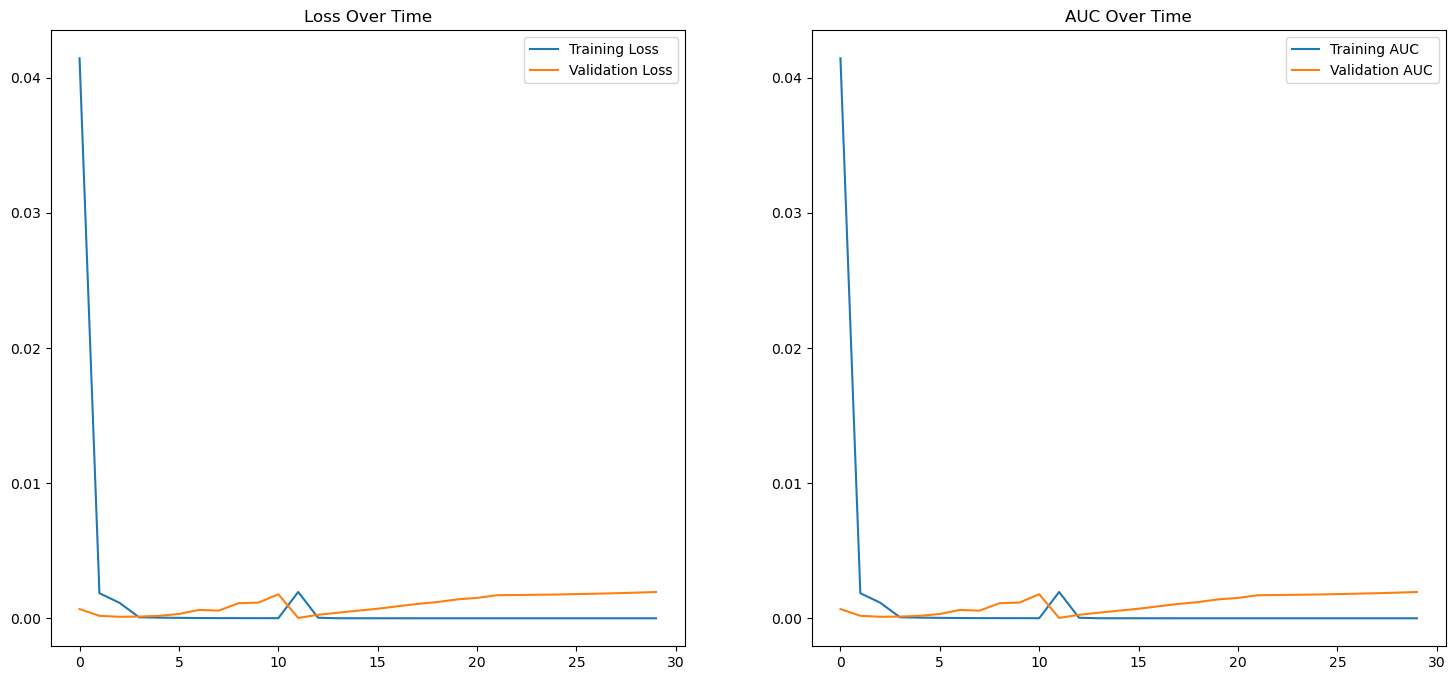

In [47]:
plt.figure(figsize=(18, 8))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training AUC')
plt.plot(epochs_range, val_loss, label='Validation AUC')
plt.legend()
plt.title('AUC Over Time')

plt.show()

In [48]:
model.evaluate(X_test, y_test)

220/220 [==============================] - 1s 4ms/step - loss: 0.0026 - auc: 0.9999


[0.0025962553918361664, 0.9999196529388428]